In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle



In [ ]:
df=pd.read_csv("/content/mobile_recommendation_system_dataset.csv")

In [ ]:
df


,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...
...,...,...,...,...,...
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...
2543,Motorola a50,4.1,1549,https://rukminim2.flixcart.com/image/312/312/k...,NaN
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...


In [ ]:
df.shape


(2546, 5)

In [ ]:
cleaned_df=df.dropna()

In [ ]:
cleaned_df.isnull().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [ ]:
df.columns

Index(['name', 'ratings', 'price', 'imgURL', 'corpus'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


In [ ]:

def extract_storage(corpus):
    """Extract the storage capacity from the corpus."""
    match = re.search(r'Storage(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

# Apply the function to the 'corpus' column
cleaned_df['Storage'] = cleaned_df['corpus'].apply(extract_storage)

# Display the first few rows of the DataFrame
cleaned_df.head()

,name,ratings,price,imgURL,corpus,Storage
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0


In [ ]:
def extract_ram(corpus):
    """Extract the RAM from the corpus."""
    match = re.search(r'RAM(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

def extract_system(corpus):
    """Extract the operating system from the corpus."""
    match = re.search(r'System(.*?)Processor', corpus)
    if match:
        return match.group(1).strip()
    return None

def extract_processor(corpus):
    """Extract the processor type from the corpus."""
    match = re.search(r'Processor (.*?) ', corpus)
    if match:
        return match.group(1).strip()
    return None

# Apply the functions to the 'corpus' column
cleaned_df['RAM'] = cleaned_df['corpus'].apply(extract_ram)
cleaned_df['System'] = cleaned_df['corpus'].apply(extract_system)
cleaned_df['Processor'] = cleaned_df['corpus'].apply(extract_processor)


def extract_brand(name):
    """Extract the brand from the name."""
    return name.split()[0]
    # Apply the function to the 'name' column
cleaned_df['Brand'] = cleaned_df['name'].apply(extract_brand)

# Display the first few rows of the DataFrame
cleaned_df.head()

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,TypeMediatek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,TypeMediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Speed2.4,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,TypeQualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15,TypeA15,APPLE


In [ ]:
# Check the unique values for 'System' and 'Processor'
unique_systems = cleaned_df['System'].unique()
unique_processors = cleaned_df['Processor'].unique()

unique_systems, unique_processors

(array(['Android 12', 'Android Pie 9.0', 'Android 11', 'Android Q 11',
        'iOS 15', 'iOS 9', 'Android 13', 'Android Pie 9',
        'Android Nougat 7', 'Android 10', 'iOS 16', None,
        'Android Q Android Q 12.5', 'Android Oreo 8.1',
        'Android Marshmallow 6.0.1', 'Android Oreo 8.1.0',
        'Android 13 (Go Edition)', 'Android Android 12', 'Android Q 10',
        'iOS 14.2', 'Android Pie Android v9.0 (Pie)', 'Android Andriod 11',
        'Android Android 10',
        'Android HiOS 8.6 based on Android 12-Go Edition',
        'Android Nougat 7.1', 'iOS 14', 'Android Android 13', 'iOS 12',
        'Android 12 Go', 'iOS 7', 'Android Nougat 7.1.2',
        'Android Oreo V11', 'Android ANdroid 13 OxygenOS',
        'Android Android 13.0', 'Android Android v12.0',
        'Android Android 11', 'Android Pie 10', 'Android Oreo 8.0', 'Q 10',
        'Android Q ANDROID 10', 'Android Q 12', 'iOS 13',
        'Android Android 11 Go', 'Android 10 (Go Edition)',
        'Android Oxy

In [ ]:
def clean_system(system):
    """Clean the system values."""
    if pd.isnull(system):
        return None
    if 'android' in system.lower():
        return 'Android'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    return system

# Apply the function to the 'System' column
cleaned_df['System'] = cleaned_df['System'].apply(clean_system)

# Check the unique values for 'System'
unique_systems_clean = cleaned_df['System'].unique()

unique_systems_clean

array(['Android', 'iOS', None, 'Q 10', 'Series 30 Feature phone', '1',
       'Series 30', 'Tizen'], dtype=object)

In [ ]:
def clean_processor(processor):
    """Clean the processor values."""
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return 'Other'

# Apply the function to the 'Processor' column
cleaned_df['Processor'] = cleaned_df['Processor'].apply(clean_processor)

# Check the unique values for 'Processor'
unique_processors_clean = cleaned_df['Processor'].unique()

unique_processors_clean

array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

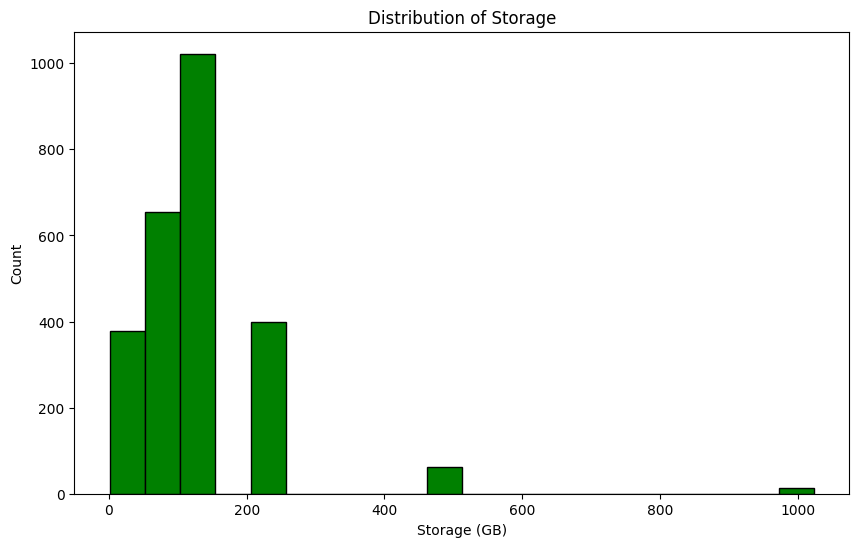

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['Storage'], bins=20, edgecolor='black',color='green')
plt.title('Distribution of Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')
plt.show()

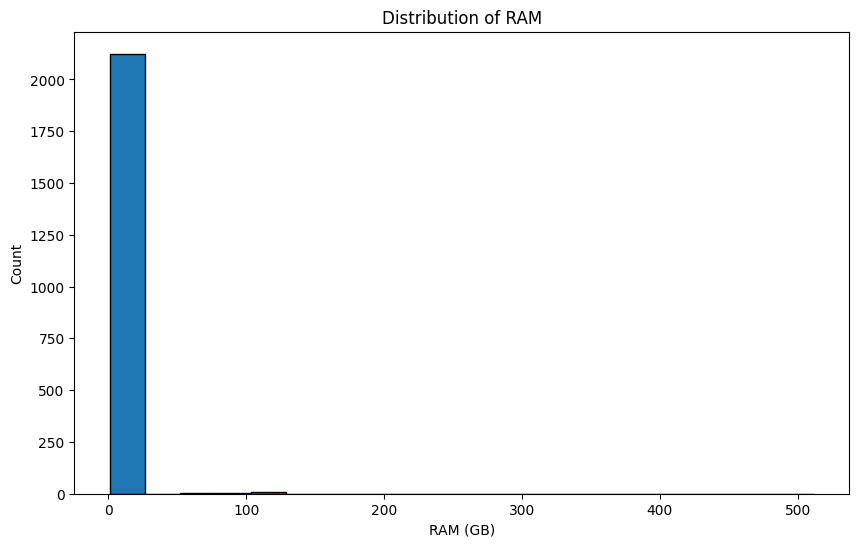

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['RAM'].dropna(), bins=20, edgecolor='black')  # Drop NaN values for the plot
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

In [ ]:
def clean_price(price):
    """Clean the price values."""
    # Remove any non-numeric characters
    cleaned_price = re.sub(r'\D', '', price)

    # Convert the remaining value to an integer
    try:
        return int(cleaned_price)
    except ValueError:
        return None

# Apply the function to the 'price' column
cleaned_df['price'] = cleaned_df['price'].apply(clean_price)


In [ ]:
# Calculate the average price for each system
avg_price_system = cleaned_df.groupby('System')['price'].mean()

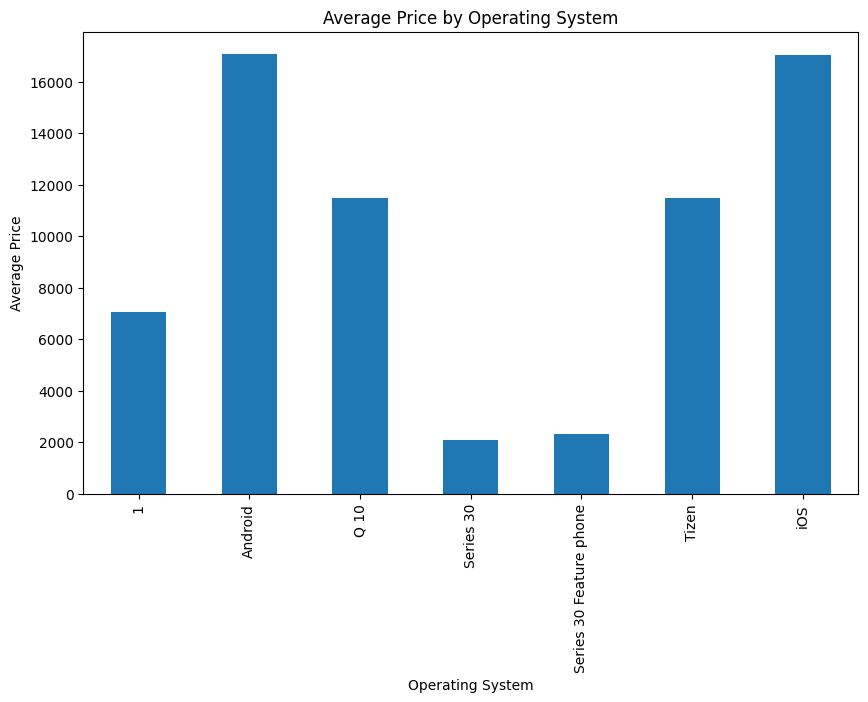

In [ ]:

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_system.plot(kind='bar')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# Calculate the average price for each processor
avg_price_processor = cleaned_df.groupby('Processor')['price'].mean()

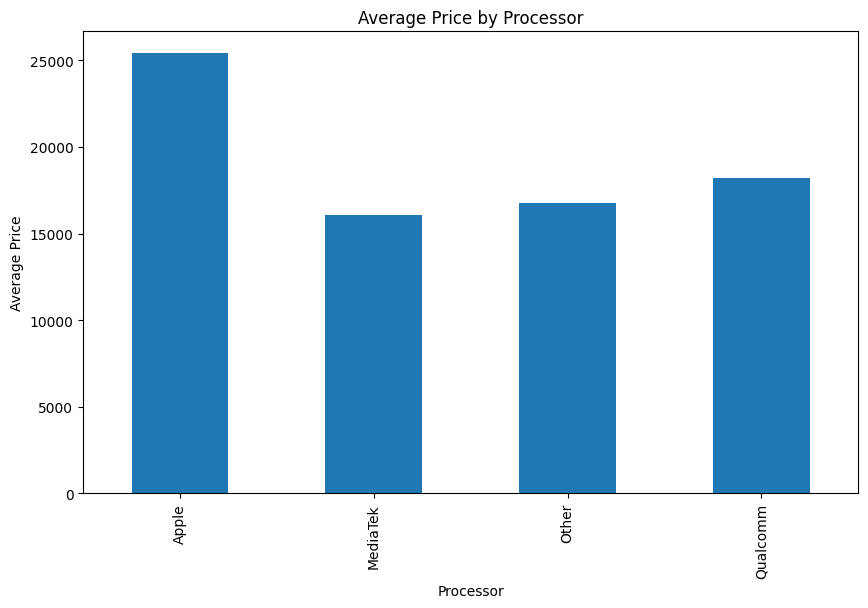

In [ ]:
# Plot a bar chart of the average price for each processor
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.show()

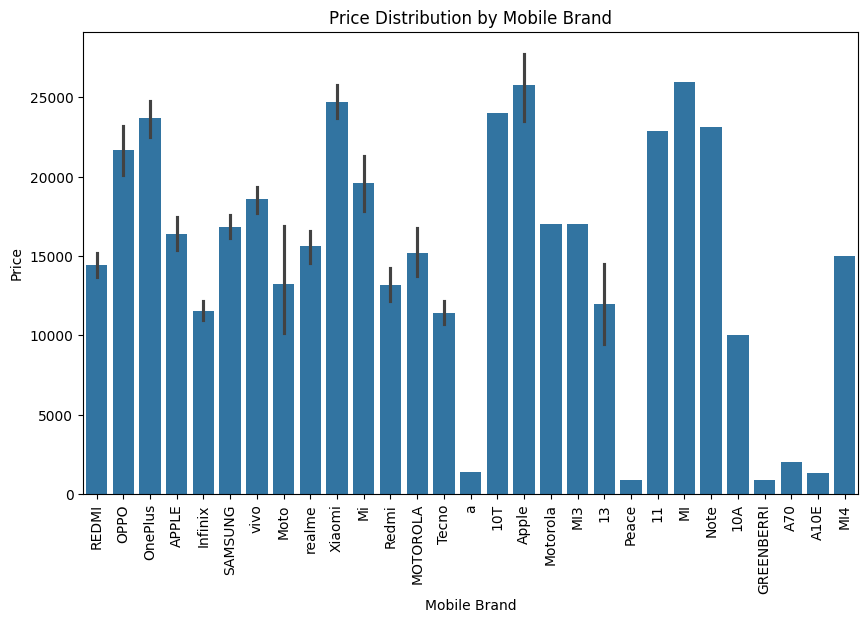

In [ ]:
# Assuming 'data' is a DataFrame with 'Brand' and 'Price' columns
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='price', data=cleaned_df)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many brands
plt.title('Price Distribution by Mobile Brand')
plt.xlabel('Mobile Brand')
plt.ylabel('Price')
plt.show()

From the above plot we can see brands apple and mi are having high price compare to all mobile phones.

In [ ]:
cleaned_df.columns

Index(['name', 'ratings', 'price', 'imgURL', 'corpus', 'Storage', 'RAM',
       'System', 'Processor', 'Brand'],
      dtype='object')

# **content-based filtering**

# **Model**

vectorization(to convert the words to vectors)

In [ ]:
cleaned_df['combined'] = cleaned_df[['ratings', 'price', 'imgURL','Storage', 'RAM', 'System', 'Processor', 'Brand']].astype(str).apply(lambda x: ' '.join(x), axis=1)
# Convert all the selected columns to string type before joining them


In [ ]:
cleaned_df

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand,combined
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek,REDMI,4.2 23999 https://rukminim2.flixcart.com/image...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO,4.5 20999 https://rukminim2.flixcart.com/image...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other,REDMI,4.2 13149 https://rukminim2.flixcart.com/image...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm,OnePlus,4.1 21999 https://rukminim2.flixcart.com/image...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other,APPLE,4.6 3537 https://rukminim2.flixcart.com/image/...
...,...,...,...,...,...,...,...,...,...,...,...
2540,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 10Processor S...,128.0,8.0,Android,Other,SAMSUNG,4.2 27440 https://rukminim2.flixcart.com/image...
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...,64.0,4.0,Android,MediaTek,REDMI,4.3 11999 https://rukminim2.flixcart.com/image...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...,128.0,8.0,Android,Other,OnePlus,3.9 30203 https://rukminim2.flixcart.com/image...
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...,256.0,12.0,Android,Other,SAMSUNG,4.3 20463 https://rukminim2.flixcart.com/image...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cont_vect = CountVectorizer()


In [ ]:
cont_vect = CountVectorizer(max_features=1000)

In [ ]:

arrays = cont_vect.fit_transform(cleaned_df['combined'])

In [ ]:
vectors = arrays.toarray()

In [ ]:
cont_vect.get_feature_names_out()

array(['10', '100', '10073', '1024', '10490', '10499', '10537', '10990',
       '10999', '10c', '10s', '10t', '11', '11000', '11172', '11199',
       '11464', '11490', '11499', '11537', '1172', '11990', '11999',
       '11r', '11s', '11t', '11x', '12', '12331', '12498', '12499',
       '12636', '12749', '12799', '128', '12900', '12990', '12999', '12c',
       '13', '13363', '13490', '13499', '13828', '13927', '13980',
       '13990', '13999', '14463', '14499', '14537', '1463', '14699',
       '14990', '14999', '15', '1537', '15490', '15499', '15537', '15636',
       '15990', '15999', '16', '16490', '16499', '16537', '16990',
       '16999', '17000', '17499', '17537', '17636', '17990', '17999',
       '18499', '18537', '18609', '18937', '18990', '18999', '19', '1907',
       '1916', '1917', '1933', '19364', '1951', '19728', '19864', '19900',
       '19927', '19990', '19999', '20', '2004', '2018', '2020', '2021',
       '2022', '2023', '20537', '20546', '20990', '20999', '21073',
       

**Calculating cosine similarity for recommendation**

In [ ]:
similarity = cosine_similarity(vectors)
similarity.shape

(2534, 2534)

In [ ]:
similarity[5]

array([0.57396402, 0.4645821 , 0.66226618, ..., 0.6181151 , 0.60246408,
       0.60246408])

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:11]

[(68, 0.9746794344808962),
 (303, 0.9746794344808962),
 (576, 0.9733285267845752),
 (25, 0.9473684210526314),
 (452, 0.9473684210526314),
 (819, 0.9473684210526314),
 (2368, 0.9473684210526314),
 (616, 0.9233805168766386),
 (1461, 0.9233805168766386),
 (2301, 0.9233805168766385)]

In [ ]:
def recommend(mobile):
    mobile_index = cleaned_df[cleaned_df['name']==mobile].index[0]
    similarity_array = similarity[mobile_index]
    similar_10_mobiles = sorted(list(enumerate(similarity_array)),reverse=True,key=lambda x:x[1])[1:11]

    for i in similar_10_mobiles:
        print(cleaned_df['name'].iloc[i[0]])

In [ ]:
recommend('OPPO F11 Pro (Aurora Green, 128 GB)')

OPPO F11 Pro (Thunder Black, 128 GB)
OPPO F11 Pro (Waterfall Grey, 128 GB)
OPPO F11 Pro (Thunder Black, 64 GB)
OPPO F19 Pro+ 5G (Fluid Black, 128 GB)
OPPO F21 Pro (Sunset Orange, 128 GB)
OPPO R17 Pro (Radiant Mist, 128 GB)
OPPO F11 (Fluorite Purple, 128 GB)
OPPO F11 (Marble Green, 128 GB)
OPPO F11 (Jewelry White, 128 GB)
OPPO F11 (Marble Green, 128 GB)


In [ ]:
recommend('OnePlus Nord CE 5G (Blue Void, 256 GB)')

OnePlus 8 Pro (Ultramarine Blue, 256 GB)
OnePlus Nord CE 5G (Silver Ray, 256 GB)
OnePlus Nord 2T 5G (Gray Shadow, 256 GB)
OnePlus Nord 2T 5G (Gray Shadow, 256 GB)
OnePlus 10T 5G (Jade Green, 256 GB)
OnePlus Nord 2 5G (Green Wood, 256 GB)
OnePlus Nord 2T 5G (Jade Fog, 256 GB)
OnePlus 9 Pro 5G (Morning Mist, 256 GB)
OnePlus 10T 5G (Moonstone Black, 256 GB)
OnePlus 9 5G (Astral Black, 256 GB)


In [ ]:
recommend('REDMI Note 11 (Starburst White, 64 GB)')

REDMI Note 11 (Starburst White, 64 GB)
REDMI Note 11 (Horizon Blue, 64 GB)
REDMI 9 Activ (Metallic Purple, 64 GB)
REDMI Note 11 (Space Black, 64 GB)
REDMI Note 11 (Space Black, 64 GB)
REDMI Note 11T 5G (Matte black, 64 GB)
REDMI Note 11T 5G (Aquamarine Blue, 64 GB)
REDMI Note 11S (Space Black, 64 GB)
REDMI Note 11T 5G (Stardust White, 64 GB)
REDMI A2+ (Classic Black, 64 GB)


# **Pickle file**

In [ ]:
os.makedirs(r'src\model',exist_ok=True)

In [ ]:
pickle.dump(obj=cleaned_df,file=open(file=r'src\model\dataframe.pkl',mode='wb'))


In [ ]:
pickle.dump(obj=similarity,file=open(file=r'src\model\similarity.pkl',mode='wb'))